In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [4]:
# part = pd.read_csv('C:/Users/ParkHyosung/iCloudDrive/대학원/대학원 업무/Distinct_Taskk/anomaly_reduction1.csv')

part = pd.read_csv('C:/Users/hyo/iCloudDrive/대학원/대학원 업무/Distinct_Taskk/csv/Mixed_full.csv')

In [5]:
df = pd.DataFrame(data = part)
df = df.sample(frac=1).reset_index(drop=True)

In [6]:
X = df.drop('Label', axis = 1)
y = df['Label']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [8]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [9]:
pipe = Pipeline([('pca', PCA())])

param_grid = {'pca__n_components': [5, 7, 9, 11, 13]}

In [10]:
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5, error_score='raise')
grid_search.fit(X_train_std, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('pca', PCA())]),
             param_grid={'pca__n_components': [5, 7, 9, 11, 13]})

In [11]:
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
result = grid_search.cv_results_
print(result.keys())
print(grid_search.cv_results_['mean_test_score'])

Best parameters:  {'pca__n_components': 13}
Best cross-validation score: -61.47
dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_pca__n_components', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])
[-76.71446469 -70.64483989 -66.88392052 -64.24415631 -61.47301457]


In [12]:
best_model = grid_search.best_estimator_
print("best : ", best_model)

best :  Pipeline(steps=[('pca', PCA(n_components=13))])


In [13]:
nb = GaussianNB(var_smoothing = 1e-6) 
nb.fit(X_train_std, y_train)

GaussianNB(var_smoothing=1e-06)

In [14]:
pred_gnb = nb.predict(X_test_std)
acc = accuracy_score(y_test, pred_gnb)
acc

0.9092333333333333

In [15]:
conf_matrix = confusion_matrix(y_test, pred_gnb)
print(conf_matrix)

[[12455  2628]
 [   95 14822]]


In [16]:
class_report = classification_report(y_test, pred_gnb)
print(class_report)

              precision    recall  f1-score   support

           0       0.99      0.83      0.90     15083
           1       0.85      0.99      0.92     14917

    accuracy                           0.91     30000
   macro avg       0.92      0.91      0.91     30000
weighted avg       0.92      0.91      0.91     30000



In [17]:
f1_score(y_test, pred_gnb)

0.9158711032842092

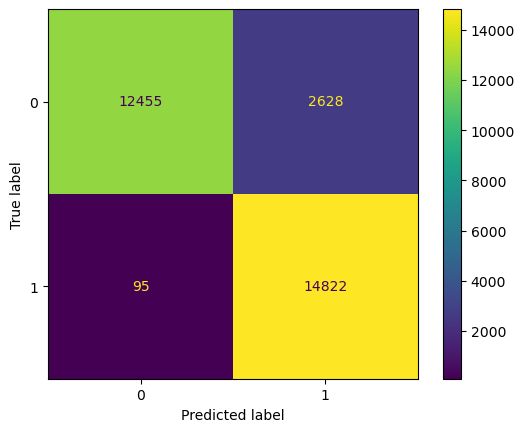

In [18]:
disp = ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()

In [19]:
print(f"원본 데이터의 차원: {X_train.shape}")
X_train_transformed = best_model.named_steps['pca'].transform(X_train_std)
print(f"PCA를 거친 데이터의 차원: {X_train_transformed.shape}")

원본 데이터의 차원: (70000, 72)
PCA를 거친 데이터의 차원: (70000, 13)


In [20]:
# tf_df = pd.DataFrame(X_train_transformed)
# print(tf_df.to_string(index = False))